# Capstone Project - Seattle Accidents Analysis


We are using this notebook for data analysis and supervised predictive modelling on historical Seattle accidents data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [2]:
data = pd.read_csv("Data-Collisions.csv")

C:\Users\utkar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("Total Rows:", len(data))
data["SEVERITYCODE"].value_counts(dropna=False)

Total Rows: 194673


1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [4]:
pd.concat([data.dtypes, data.isna().sum()], axis=1, 
          keys=["Data Types", "Null Values"]).sort_values(by=["Null Values"], ascending=False)

,Data Types,Null Values
PEDROWNOTGRNT,object,190006
EXCEPTRSNDESC,object,189035
SPEEDING,object,185340
INATTENTIONIND,object,164868
INTKEY,float64,129603
EXCEPTRSNCODE,object,109862
SDOTCOLNUM,float64,79737
JUNCTIONTYPE,object,6329
X,float64,5334
Y,float64,5334


In [5]:
# dropping features with more than 50% missing values
data.drop(columns=["PEDROWNOTGRNT", "EXCEPTRSNDESC", "SPEEDING", "INATTENTIONIND", "INTKEY", "EXCEPTRSNCODE"], inplace=True)
pd.concat([data.dtypes, data.isna().sum()], axis=1, 
          keys=["Data Types", "Null Values"]).sort_values(by=["Null Values"], ascending=False)

,Data Types,Null Values
SDOTCOLNUM,float64,79737
JUNCTIONTYPE,object,6329
Y,float64,5334
X,float64,5334
LIGHTCOND,object,5170
WEATHER,object,5081
ROADCOND,object,5012
ST_COLDESC,object,4904
COLLISIONTYPE,object,4904
UNDERINFL,object,4884


### Features and Target columns
<i>SEVERITYCODE</i> - Target Column (1:Property Damage Only Collision, 2:Injury Collision)<br>
<i>SEVERITYCODE.1</i> - Copy of Target Column (drop) <br>
<i>SEVERITYDESC</i> - Description of Target Column (drop) <br>

----------------------------------------------------------------------------------------------------------------------
<i>SDOTCOLNUM</i> - A number given to the collision by SDOT (drop)<br>
<i>JUNCTIONTYPE</i> - Category of junction at which collision took place  <br>
<i>X</i> - Coordinate of accident (drop) <br>
<i>Y</i> - Coordinate of accident (drop) <br>
<i>LIGHTCOND</i> - The light conditions during the collision. <br>
<i>WEATHER</i> - A description of the weather conditions during the time of the collision <br>
<i>ROADCOND</i> - The condition of the road during the collision <br>
<i>ST_COLDESC</i> - A description that corresponds to the state's coding designation (drop-Equivalent to ST_COLCODE) <br>
<i>COLLISIONTYPE</i> - Collision type <br>
<i>UNDERINFL</i> - Whether or not a driver involved was under the influence of drugs or alcohol (0/1) <br>
<i>LOCATION</i> - Description of the general location of the collision/address (drop) <br>
<i>ADDRTYPE</i> - Collision address type (Alley, Block, Intersection) <br>
<i>ST_COLCODE</i> - A code provided by the state that describes the collision <br>
<i>SDOT_COLDESC</i> - A description of the collision corresponding to the collision code (drop-Equivalent to SDOT_COLCODE) <br>
<i>SEGLANEKEY</i> - A key for the lane segment in which the collision occurred <br>
<i>CROSSWALKKEY</i> - A key for the crosswalk at which the collision occurred <br>
<i>SDOT_COLCODE</i> - A code given to the collision by SDOT <br>
<i>VEHCOUNT</i> - The number of vehicles involved in the collision <br>
<i>INCDTTM</i> - The date and time of the incident (drop) <br>
<i>INCDATE</i> - The date of the incident (drop) <br>
<i>PEDCYLCOUNT</i> - The number of bicycles involved in the collision <br>
<i>PEDCOUNT</i> - The number of pedestrians involved in the collision <br>
<i>PERSONCOUNT</i> - The total number of people involved in the collision <br>
<i>STATUS</i> - (Matches, Unmatched) *** <br>
<i>REPORTNO</i> - Report identifier (drop) <br>
<i>COLDETKEY</i> - Secondary Key for incident (drop) <br>
<i>INCKEY</i> - Unique key for incident (drop) <br>
<i>OBJECTID</i> - ESRI unique identifier (drop) <br>
<i>HITPARKEDCAR</i> - Whether or not the collision involved hitting a parked car <br>

In [6]:
# Checking the severitycode and its related columns
print(sum(data["SEVERITYCODE"] == data["SEVERITYCODE.1"]), "rows matched.")
ref = {"Property Damage Only Collision":1, "Injury Collision":2}
print(sum(data["SEVERITYCODE"] == data["SEVERITYDESC"].apply(lambda x: ref[x])), "rows matched.")

194673 rows matched.
194673 rows matched.


In [7]:
import seaborn as sns
sns.set(style="darkgrid")

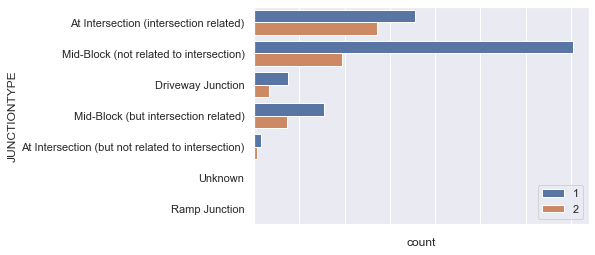

In [8]:
ax = sns.countplot(y="JUNCTIONTYPE", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

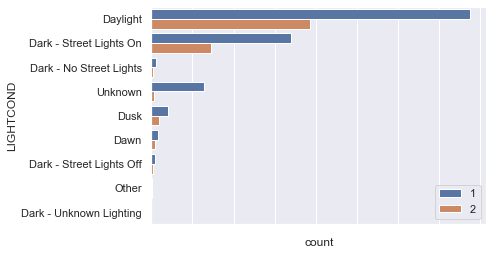

In [9]:
ax = sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

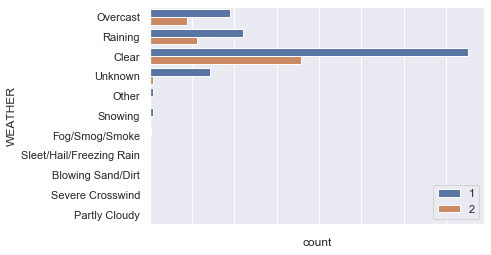

In [10]:
ax = sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

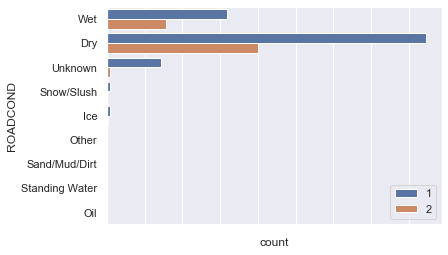

In [11]:
ax = sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

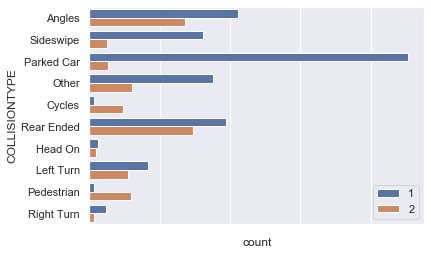

In [12]:
ax = sns.countplot(y="COLLISIONTYPE", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

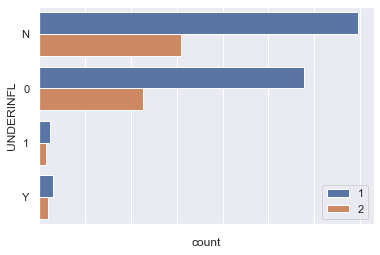

In [13]:
# Y and N needs to be mapped to 1 and 0, this will be part of data processing after train test split
ax = sns.countplot(y="UNDERINFL", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

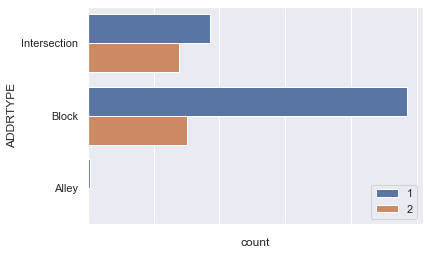

In [14]:
ax = sns.countplot(y="ADDRTYPE", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

In [15]:
# Convert the strings into int, this will be part of data processing after train test split
data["ST_COLCODE"].unique()

array(['10', '11', '32', '23', '5', '22', '14', '30', ' ', '28', '51',
       '13', '50', '12', '45', '0', '20', '21', '1', '52', '16', '15',
       '74', '81', '26', '19', '2', '66', '71', '3', '24', '40', '57',
       '6', '83', '25', '27', '4', '72', '29', '56', '73', '41', '17',
       '65', '82', '67', '49', '84', '31', '43', '42', '48', '64', '53',
       32, 50, 15, 10, 14, 20, 13, 22, 51, 11, 28, 12, 52, 21, 0, 19, 30,
       16, 40, 26, 27, 83, 2, 45, 65, 23, 24, 71, 1, 29, 81, 25, 4, 73,
       74, 72, 3, 84, 64, 57, 42, 41, 48, 66, 56, 31, 82, 67, '54', '60',
       53, 43, 87, 54, '87', nan, '7', '8', '85', '88', '18'],
      dtype=object)

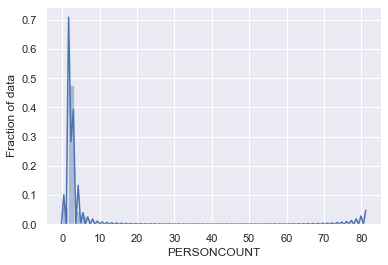

In [16]:
ax = sns.distplot(data["PERSONCOUNT"])
plt.ylabel("Fraction of data")
plt.show()

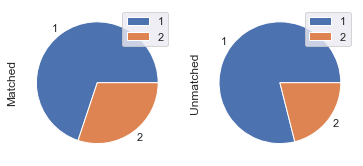

In [17]:
df = data.groupby(by=["STATUS", "SEVERITYCODE"]).count()["OBJECTID"]
df.unstack().transpose().plot.pie(subplots=True)
plt.show()

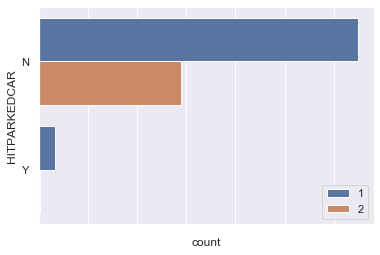

In [18]:
ax = sns.countplot(y="HITPARKEDCAR", hue="SEVERITYCODE", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.legend(loc='lower right')
plt.show()

In [19]:
# Lets drop the columns which are not usefull for our model.
drop_cols = ["SEVERITYCODE.1", "SEVERITYDESC", "SDOTCOLNUM", "X", "Y", "ST_COLDESC", "LOCATION", "SDOT_COLDESC", 
             "INCDTTM", "INCDATE", "REPORTNO", "COLDETKEY", "INCKEY", "OBJECTID"]
data.drop(columns=drop_cols, inplace=True)
data.head()

,SEVERITYCODE,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,Matched,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,N,Overcast,Wet,Daylight,10,0,0,N
1,1,Matched,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),16,0,Raining,Wet,Dark - Street Lights On,11,0,0,N
2,1,Matched,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),14,0,Overcast,Dry,Daylight,32,0,0,N
3,1,Matched,Block,Other,3,0,0,3,Mid-Block (not related to intersection),11,N,Clear,Dry,Daylight,23,0,0,N
4,2,Matched,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,Raining,Wet,Daylight,10,0,0,N


### Train Test Split

In [20]:
data_y = data[["SEVERITYCODE"]]
data_X = data.drop(columns=["SEVERITYCODE"])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.30, random_state=42, stratify=data_y, shuffle=True)

### Data Processing